In [1]:
import pandas as pd
import censusdata
import geopandas
import matplotlib.pyplot as plt
import numpy as np
import glob
import seaborn as sns
from scipy import stats

%matplotlib inline
%config InlineBackend.figure_format ='retina'

In [2]:
from config import *

In [3]:
#Enrollment data

In [4]:
df2_path = dataFolder + "DSTUD.csv"

df2 = pd.read_csv(df2_path)
df2

,DISTRICT,DISTNAME,DPNTG01C,DPNTG01P,DPNTG02C,DPNTG02P,DPNTG03C,DPNTG03P,DPNTG04C,DPNTG04P,...,DPNTG11C,DPNTG11P,DPNTG12C,DPNTG12P,DPNTGEEC,DPNTGEEP,DPNTGKNC,DPNTGKNP,DPNTGPKC,DPNTGPKP
0,'001902,CAYUGA ISD,30,5.6,35,6.5,26,4.9,53,9.9,...,46,8.6,38,7.1,2,0.4,42,7.9,0,0.0
1,'001903,ELKHART ISD,91,7.6,86,7.2,98,8.2,82,6.8,...,84,7.0,90,7.5,1,0.1,82,6.8,62,5.2
2,'001904,FRANKSTON ISD,68,8.8,57,7.4,45,5.9,54,7.0,...,47,6.1,44,5.7,1,0.1,37,4.8,28,3.6
3,'001906,NECHES ISD,22,6.5,20,5.9,26,7.7,24,7.1,...,24,7.1,23,6.8,0,0.0,39,11.5,13,3.8
4,'001907,PALESTINE ISD,259,7.6,236,6.9,203,6.0,237,7.0,...,272,8.0,209,6.1,3,0.1,232,6.8,217,6.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199,'252902,NEWCASTLE ISD,11,5.2,12,5.7,11,5.2,17,8.1,...,16,7.6,16,7.6,1,0.5,15,7.1,13,6.2
1200,'252903,OLNEY ISD,54,7.6,45,6.4,49,6.9,31,4.4,...,47,6.6,33,4.7,3,0.4,47,6.6,54,7.6
1201,'253901,ZAPATA COUNTY ISD,261,7.5,238,6.8,244,7.0,256,7.3,...,247,7.1,216,6.2,9,0.3,240,6.9,153,4.4
1202,'254901,CRYSTAL CITY ISD,135,7.3,137,7.5,131,7.1,116,6.3,...,112,6.1,115,6.3,9,0.5,125,6.8,77,4.2


In [5]:
df2 = df2[['DISTRICT','DISTNAME','DPNTG03C']]

In [6]:
df2 = df2.rename(columns={'DPNTG03C': 'enroll_count'})

In [7]:
df2

,DISTRICT,DISTNAME,enroll_count
0,'001902,CAYUGA ISD,26
1,'001903,ELKHART ISD,98
2,'001904,FRANKSTON ISD,45
3,'001906,NECHES ISD,26
4,'001907,PALESTINE ISD,203
...,...,...,...
1199,'252902,NEWCASTLE ISD,11
1200,'252903,OLNEY ISD,49
1201,'253901,ZAPATA COUNTY ISD,244
1202,'254901,CRYSTAL CITY ISD,131


In [8]:
df3_path = dataFolder + "DSTAAR_GR3 (1).csv"

df3 = pd.read_csv(df3_path)

In [9]:
df3 = df3[['DISTRICT','DDA03ARE1S22R','DDA03ARE1322R','DDA03ARE1222R']]

In [10]:
df3 = df3.rename(columns={'DDA03ARE1S22R': 'approaches_ELA', 'DDA03ARE1322R': 'masters_ELA', 'DDA03ARE1222R': 'meets_ELA'})

In [11]:
#MERGE COUNT AND SCORES DATA

In [12]:
df = pd.merge(df3, df2, left_on="DISTRICT", right_on="DISTRICT", how="inner")

In [13]:
df

,DISTRICT,approaches_ELA,masters_ELA,meets_ELA,DISTNAME,enroll_count
0,'001902,83,57,74,CAYUGA ISD,26
1,'001903,89,34,58,ELKHART ISD,98
2,'001904,89,18,53,FRANKSTON ISD,45
3,'001906,90,30,65,NECHES ISD,26
4,'001907,72,28,48,PALESTINE ISD,203
...,...,...,...,...,...,...
1198,'252902,58,33,50,NEWCASTLE ISD,11
1199,'252903,76,31,50,OLNEY ISD,49
1200,'253901,74,18,46,ZAPATA COUNTY ISD,244
1201,'254901,65,21,34,CRYSTAL CITY ISD,131


In [14]:
# df['DISTNAME'] = df['DISTNAME'].str.replace('ISD','')

In [15]:
df['DISTNAME'] = df['DISTNAME'].apply(lambda x: str(x).replace('ISD', '').strip().lower())

In [16]:
# df['DISTNAME'] = df['DISTNAME'].astype(str)

In [17]:
# df['DISTNAME'] = df['DISTNAME'].str.strip()

In [18]:
df[df['DISTNAME']==('plano')]

,DISTRICT,approaches_ELA,masters_ELA,meets_ELA,DISTNAME,enroll_count
206,'043910,85,44,66,plano,3559


In [19]:
df

,DISTRICT,approaches_ELA,masters_ELA,meets_ELA,DISTNAME,enroll_count
0,'001902,83,57,74,cayuga,26
1,'001903,89,34,58,elkhart,98
2,'001904,89,18,53,frankston,45
3,'001906,90,30,65,neches,26
4,'001907,72,28,48,palestine,203
...,...,...,...,...,...,...
1198,'252902,58,33,50,newcastle,11
1199,'252903,76,31,50,olney,49
1200,'253901,74,18,46,zapata county,244
1201,'254901,65,21,34,crystal city,131


In [20]:
x_walk = pd.read_excel(dataFolder + 'grf22_lea_tract.xlsx')

In [21]:
x_walk = x_walk[x_walk['TRACT'] // 10**9 == 48]

In [22]:
# x_walk[x_walk['NAME_LEA22'].str.contains('cayu')]

In [23]:
#x_walk['NAME_LEA22'] = x_walk['NAME_LEA22'].map(lambda x: x.lstrip('Elementary').rstrip('School District'))

In [24]:
x_walk['NAME_LEA22'] = x_walk['NAME_LEA22'].str.replace(r'[0-9]', '', regex=True)

In [25]:
x_walk['NAME_LEA22'] = x_walk['NAME_LEA22'].str.replace('Elementary', '', regex=True)

In [26]:
x_walk['NAME_LEA22'] = x_walk['NAME_LEA22'].str.replace('Independent', '', regex=True)

In [27]:
x_walk['NAME_LEA22'] = x_walk['NAME_LEA22'].str.replace('School District', '', regex=True)

In [28]:
x_walk['NAME_LEA22'] = x_walk['NAME_LEA22'].str.replace('Community', '', regex=True)

In [29]:
x_walk['NAME_LEA22'] = x_walk['NAME_LEA22'].str.replace('Unit', '', regex=True)

In [30]:
x_walk['NAME_LEA22'] = x_walk['NAME_LEA22'].str.replace('City', '', regex=True)

In [31]:
x_walk['NAME_LEA22'] = x_walk['NAME_LEA22'].str.replace('County', '', regex=True)

In [32]:
x_walk['NAME_LEA22'] = x_walk['NAME_LEA22'].apply(lambda x: x.lower())

In [33]:
x_walk[x_walk['NAME_LEA22'].str.contains('plano')]

,LEAID,NAME_LEA22,TRACT,COUNT,LANDAREA,WATERAREA
113445,4835100,plano,48085031314,106,0.551315,0.000699
113446,4835100,plano,48085031324,106,2.286313,0.039068
113447,4835100,plano,48085031325,106,1.301194,0.007458
113448,4835100,plano,48085031326,106,4.920405,0.016331
113449,4835100,plano,48085031327,106,1.702577,0.003052
...,...,...,...,...,...,...
113546,4835100,plano,48085032015,106,0.454753,0.000000
113547,4835100,plano,48085032016,106,1.082131,0.006424
113548,4835100,plano,48085032017,106,0.840834,0.012157
113549,4835100,plano,48085032018,106,0.675525,0.000000


In [34]:
x_walk['NAME_LEA22'] = x_walk['NAME_LEA22'].astype(str)

In [35]:
x_walk['NAME_LEA22'] = x_walk['NAME_LEA22'].str.strip()

In [36]:
S1 = set(df['DISTNAME'])
S2 = set(x_walk['NAME_LEA22'])
S2 - S1

{'',
 'anderson-shiro consolidated',
 'aransas',
 'archer',
 'bay',
 'bishop consolidated',
 'blackwell consolidated',
 'borden',
 'bridge',
 'brooks',
 'burnet consolidated',
 'calhoun',
 'carrizo springs consolidated',
 'clyde consolidated',
 'coldspring-oakhurst consolidated',
 'como-pickton consolidated',
 'crockett  consolidated common',
 'crosbyton consolidated',
 'crystal',
 'culberson -allamoore',
 'de kalb',
 'dell',
 'denver',
 'dodd',
 'doss consolidated common',
 'eagle mountain-saginaw',
 'ed',
 'eden consolidated',
 'edinburg consolidated',
 'falls',
 'fort davis',
 'fort elliott consolidated',
 'fort hancock',
 'fort sam houston',
 'glasscock',
 'gold-burg',
 'goldthwaite consolidated',
 'goose creek consolidated',
 'guthrie common',
 'hallettsville   (-) in vysehrad',
 'hamlin',
 'harlingen consolidated',
 'haskell consolidated',
 'hays consolidated',
 'iowa park consolidated',
 'irion',
 'jim hogg',
 'jim ned consolidated',
 'johnson',
 'karnes',
 'kenedy -wide common'

In [37]:
merge = pd.merge(df, x_walk, left_on="DISTNAME", right_on="NAME_LEA22", how="inner")

In [38]:
merge

,DISTRICT,approaches_ELA,masters_ELA,meets_ELA,DISTNAME,enroll_count,LEAID,NAME_LEA22,TRACT,COUNT,LANDAREA,WATERAREA
0,'001902,83,57,74,cayuga,26,4813200,cayuga,48001950401,4,1.277912,0.032006
1,'001902,83,57,74,cayuga,26,4813200,cayuga,48001950402,4,27.196010,1.004812
2,'001902,83,57,74,cayuga,26,4813200,cayuga,48001950901,4,0.085875,0.001938
3,'001902,83,57,74,cayuga,26,4813200,cayuga,48001951100,4,201.937811,3.674317
4,'001903,89,34,58,elkhart,98,4818390,elkhart,48001950800,6,0.005141,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
10077,'252903,76,31,50,olney,49,4833630,olney,48447950300,6,8.414346,0.004081
10078,'252903,76,31,50,olney,49,4833630,olney,48503950200,6,125.037414,0.981690
10079,'252903,76,31,50,olney,49,4833630,olney,48503950402,6,16.396971,0.131345
10080,'254902,73,19,50,la pryor,38,4826250,la pryor,48507950200,2,220.390654,0.723669


In [39]:
#merge[merge['STCOUNTY']==48507]

In [40]:
merge

,DISTRICT,approaches_ELA,masters_ELA,meets_ELA,DISTNAME,enroll_count,LEAID,NAME_LEA22,TRACT,COUNT,LANDAREA,WATERAREA
0,'001902,83,57,74,cayuga,26,4813200,cayuga,48001950401,4,1.277912,0.032006
1,'001902,83,57,74,cayuga,26,4813200,cayuga,48001950402,4,27.196010,1.004812
2,'001902,83,57,74,cayuga,26,4813200,cayuga,48001950901,4,0.085875,0.001938
3,'001902,83,57,74,cayuga,26,4813200,cayuga,48001951100,4,201.937811,3.674317
4,'001903,89,34,58,elkhart,98,4818390,elkhart,48001950800,6,0.005141,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
10077,'252903,76,31,50,olney,49,4833630,olney,48447950300,6,8.414346,0.004081
10078,'252903,76,31,50,olney,49,4833630,olney,48503950200,6,125.037414,0.981690
10079,'252903,76,31,50,olney,49,4833630,olney,48503950402,6,16.396971,0.131345
10080,'254902,73,19,50,la pryor,38,4826250,la pryor,48507950200,2,220.390654,0.723669


In [41]:
merge['meets_ELA'] = merge['meets_ELA'].astype(int)

In [42]:
merge['total_meet_ela'] = (merge['meets_ELA'] / 100) * merge['enroll_count']

In [43]:
xwalk = pd.read_pickle(dataFolder + "/xwalk_data_combined.pkl")
#Extract block group code
xwalk['tract'] = (xwalk['bgrp'] / 10).astype(int)
fipsToCbsa = xwalk.groupby('tract').first()['cbsa']
fipsToCbsa = dict(zip(fipsToCbsa.index, fipsToCbsa.values)) #Dict is faster for lookup

merge['CBSA'] = merge['TRACT'].apply(lambda c: fipsToCbsa.get(c, 99999))

In [44]:
new_df = merge.groupby(by='CBSA').agg({'enroll_count':'sum','total_meet_ela':'sum'})

In [45]:
new_df['pct_meet_ela'] = new_df['total_meet_ela'] / new_df['enroll_count']

In [46]:
new_df = new_df.reset_index()

In [47]:
new_df

,CBSA,enroll_count,total_meet_ela,pct_meet_ela
0,10180,63895,32533.78,0.509176
1,10860,4686,1897.94,0.405023
2,11100,140557,78470.86,0.558285
3,11380,1268,735.44,0.580000
4,11980,8942,4996.90,0.558812
...,...,...,...,...
65,46900,7704,3643.47,0.472932
66,47020,24206,10675.25,0.441017
67,47380,57800,22034.79,0.381225
68,48660,41277,17091.14,0.414060


In [48]:
gdf = pd.read_pickle(sharedFolder + 'gdf.pkl')
gdf

,CBSA,LSAD,POPESTIMATE2020,POPESTIMATE2021,POPESTIMATE2022,NAME,geometry,metro,micro,buff,inBuff,commuteBuffCount_19,workingPop_19,commutePercent_19,commuteBuffCount_20,workingPop_20,commutePercent_20,liminal
0,10180,Metropolitan Statistical Area,176866,177829,179308,"Abilene, TX","POLYGON ((-11148262.500 3832132.455, -11148249...",False,False,"POLYGON ((-11309677.340 3783320.344, -11309649...",True,7720.0,69422.0,11.120394,7146.0,66780.0,10.700809,False
1,10420,Metropolitan Statistical Area,701625,696225,697627,"Akron, OH","POLYGON ((-9060481.928 5063847.837, -9060475.5...",False,False,"POLYGON ((-9254365.317 5020257.954, -9254364.7...",True,90313.0,323548.0,27.913324,86722.0,306288.0,28.313875,False
2,10500,Metropolitan Statistical Area,148244,144922,145786,"Albany, GA","POLYGON ((-9400975.184 3713776.408, -9400980.6...",False,False,"POLYGON ((-9578772.815 3741602.731, -9578761.8...",True,4136.0,53083.0,7.791572,3686.0,50430.0,7.309141,False
3,10540,Metropolitan Statistical Area,128978,129948,130467,"Albany-Lebanon, OR","POLYGON ((-13720236.776 5551262.937, -13720393...",False,False,"POLYGON ((-13880404.968 5518947.795, -13880524...",True,6558.0,55731.0,11.767239,6390.0,54728.0,11.675925,False
4,10580,Metropolitan Statistical Area,899748,905369,904617,"Albany-Schenectady-Troy, NY","POLYGON ((-8247992.807 5305256.748, -8248085.6...",False,False,"POLYGON ((-8472736.168 5278351.957, -8472566.1...",True,25671.0,418341.0,6.136382,25289.0,390058.0,6.483395,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,49300,Micropolitan Statistical Area,116906,116129,116559,"Wooster, OH","POLYGON ((-9089178.853 5010653.858, -9088979.1...",False,False,"POLYGON ((-9303427.427 5003041.204, -9303435.5...",True,8894.0,50856.0,17.488595,8380.0,48312.0,17.345587,False
922,49380,Micropolitan Statistical Area,22207,22047,21947,"Worthington, MN","POLYGON ((-10627927.538 5441934.306, -10627791...",False,True,"POLYGON ((-10853572.863 5404615.190, -10853573...",False,0.0,10260.0,0.000000,0.0,9763.0,0.000000,False
923,49460,Micropolitan Statistical Area,23282,23334,23373,"Yankton, SD","POLYGON ((-10855702.126 5337734.746, -10853435...",False,True,"POLYGON ((-11029881.460 5334892.015, -11029883...",False,0.0,10934.0,0.000000,0.0,10222.0,0.000000,False
924,49780,Micropolitan Statistical Area,86450,86574,86113,"Zanesville, OH","POLYGON ((-9149881.580 4868949.855, -9149879.9...",False,True,"POLYGON ((-9314594.513 4866712.033, -9313763.6...",True,9978.0,34969.0,28.533844,10044.0,33194.0,30.258480,True


In [49]:
merge1 = pd.merge(gdf, new_df, on='CBSA', how='inner')

In [50]:
merge1

,CBSA,LSAD,POPESTIMATE2020,POPESTIMATE2021,POPESTIMATE2022,NAME,geometry,metro,micro,buff,...,commuteBuffCount_19,workingPop_19,commutePercent_19,commuteBuffCount_20,workingPop_20,commutePercent_20,liminal,enroll_count,total_meet_ela,pct_meet_ela
0,10180,Metropolitan Statistical Area,176866,177829,179308,"Abilene, TX","POLYGON ((-11148262.500 3832132.455, -11148249...",False,False,"POLYGON ((-11309677.340 3783320.344, -11309649...",...,7720.0,69422.0,11.120394,7146.0,66780.0,10.700809,False,63895,32533.78,0.509176
1,11100,Metropolitan Statistical Area,269018,269853,271171,"Amarillo, TX","POLYGON ((-11373231.116 4188809.460, -11375197...",False,False,"POLYGON ((-11631548.361 4206215.360, -11631547...",...,0.0,114424.0,0.000000,0.0,112132.0,0.000000,False,140557,78470.86,0.558285
2,12420,Metropolitan Statistical Area,2299994,2358130,2421115,"Austin-Round Rock-Georgetown, TX","POLYGON ((-10914863.779 3584033.686, -10914825...",True,False,"POLYGON ((-11087494.701 3581853.969, -11086561...",...,924410.0,1034195.0,89.384497,912231.0,1020812.0,89.363272,False,1792363,1041379.72,0.581009
3,13140,Metropolitan Statistical Area,397209,395216,393575,"Beaumont-Port Arthur, TX","POLYGON ((-10513559.798 3518084.505, -10513594...",False,False,"POLYGON ((-10696169.427 3508969.116, -10696183...",...,34050.0,152826.0,22.280240,32459.0,146551.0,22.148604,False,88674,31389.02,0.353982
4,15180,Metropolitan Statistical Area,421445,423124,425208,"Brownsville-Harlingen, TX","POLYGON ((-10862097.139 3037060.501, -10862076...",False,False,"POLYGON ((-10813113.846 2820679.817, -10816270...",...,0.0,151723.0,0.000000,0.0,150589.0,0.000000,False,165320,76003.45,0.459735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,44500,Micropolitan Statistical Area,42716,43389,43895,"Stephenville, TX","POLYGON ((-10969164.821 3798552.254, -10968813...",False,True,"POLYGON ((-11121183.261 3854600.144, -11120180...",...,4492.0,18168.0,24.724791,4861.0,18422.0,26.386929,True,3289,2073.68,0.630490
65,44860,Micropolitan Statistical Area,36824,37237,37804,"Sulphur Springs, TX","POLYGON ((-10658292.131 3934709.594, -10658255...",False,True,"POLYGON ((-10832340.254 3908984.165, -10832340...",...,3212.0,13808.0,23.261877,3322.0,13879.0,23.935442,True,3522,1586.96,0.450585
66,45020,Micropolitan Statistical Area,14723,14600,14473,"Sweetwater, TX","POLYGON ((-11190248.634 3832360.623, -11190246...",False,True,"POLYGON ((-11366811.701 3784570.770, -11366811...",...,0.0,6823.0,0.000000,0.0,6518.0,0.000000,False,795,305.37,0.384113
67,46620,Micropolitan Statistical Area,24559,24810,24940,"Uvalde, TX","POLYGON ((-11104717.367 3455407.187, -11104710...",False,True,"POLYGON ((-11305361.288 3441387.350, -11305360...",...,2544.0,10602.0,23.995473,2584.0,10420.0,24.798464,True,240,138.30,0.576250


# Plotting

In [51]:
statesShp = geopandas.read_file(dataFolder + "/cb_2018_us_state_500k.zip").to_crs(3857)
statesShp = statesShp[['GEOID', 'STUSPS', 'NAME', 'geometry']]

In [52]:
def plotUS():
    ax = statesShp.plot(figsize=(20, 10))
    ax.axis('equal')
    plt.xlim(-1.5e7, -0.7e7)
    plt.ylim(2.5e6, 7e6)
    return ax

def plotTX():
    ax = statesShp[statesShp['STUSPS'] == 'TX'].plot(figsize=(10, 10), color='#e4e4e4', edgecolor='black', linewidth=2)
    ax.axis('equal')
    plt.xlim(-1.23e7, -1e7)
    plt.ylim(2.5e6, 5e6)
    return ax

def plotDFW():
    ax = statesShp[statesShp['STUSPS'] == 'TX'].plot(figsize=(10, 10), color='#e4e4e4', edgecolor='black', linewidth=2)
    ax.axis('equal')
    plt.xlim(-1.12e7, -1.04e7)
    plt.ylim(3.7e6, 4.1e6)
    return ax

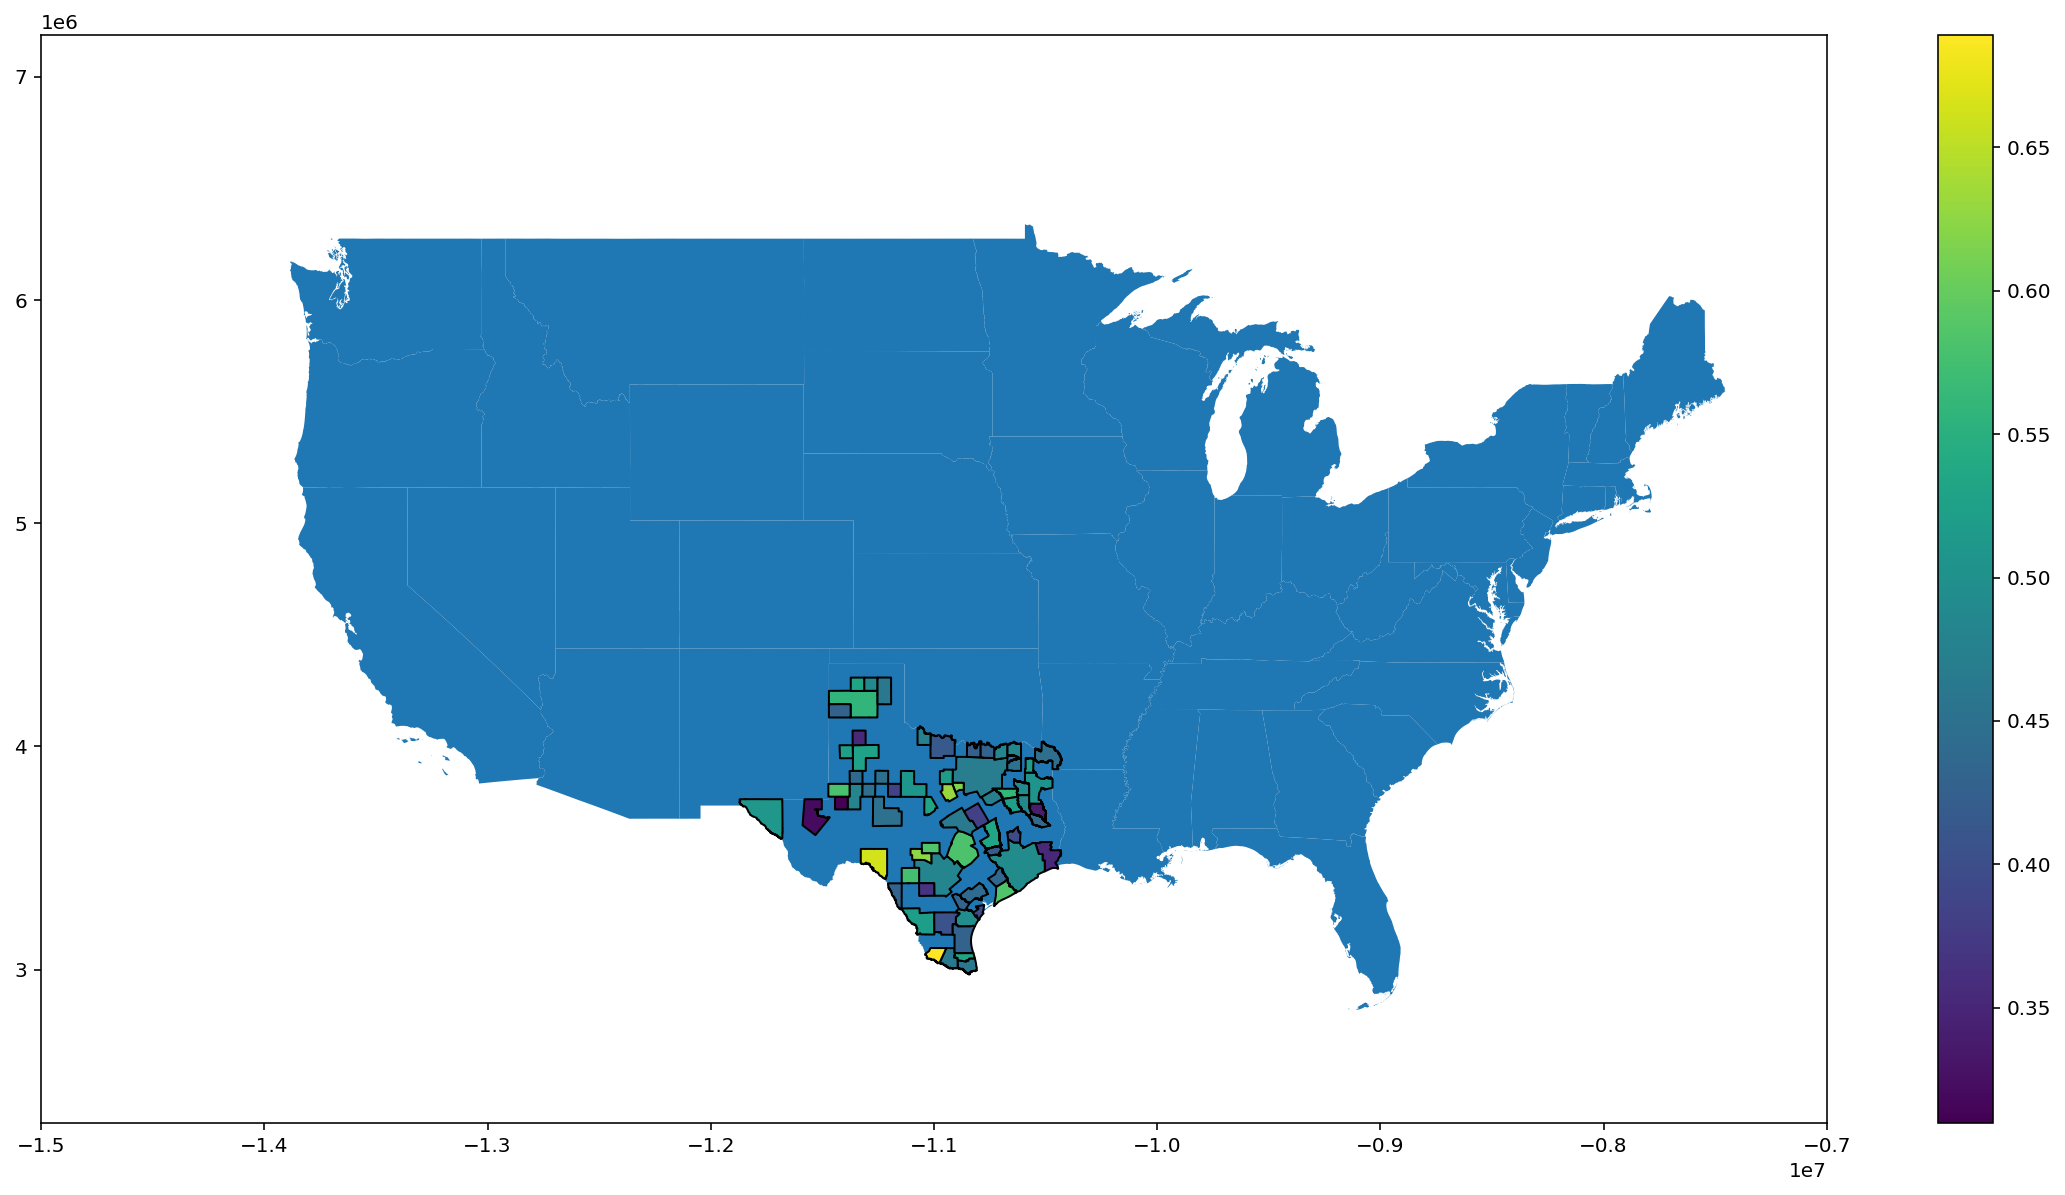

In [53]:
ax = plotUS()
merge1.plot(ax=ax, column='pct_meet_ela', edgecolor="black", linewidth=1, legend=True);

In [54]:
merge1[merge1['metro']]['pct_meet_ela'].mean()

0.506008802282199

In [55]:
merge1[merge1['liminal']]['pct_meet_ela'].mean()

0.48988504133118965

In [56]:
merge1[merge1['micro'] & ~merge1['liminal']]['pct_meet_ela'].mean()

0.47059900938609034